# Exploratory Data Analysis

In this notebook, we"ll analyze the ADNIMERGE dataset on patient visits with potential Alzheimer"s disease. We"ll conduct an exploratory analysis to determine how to proceed in the Data Preprocessing phase.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import re
import seaborn as sns

from CogniPredictAD.visualization import Visualizer

pd.set_option("display.max_rows", 116)
pd.set_option("display.max_columns", 116)
pd.set_option("display.max_info_columns", 116) 


## Loading the Dataset

Open the ADNIMERGE dataset with Pandas.

In [2]:
# Open the dataset with pandas
dataset = pd.read_csv("../data/ADNIMERGE.csv")
viz = Visualizer(dataset)
dataset.shape
dataset

C:\Users\Utente\AppData\Local\Temp\ipykernel_21396\1066112732.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/ADNIMERGE.csv")


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.33615,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.31028,-4.11443,2005-09-08,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.31028,-4.114430,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10860,NaN,NaN,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.24490,-15.82990,2005-09-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.24490,-15.829900,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.07796,NaN,NaN,NaN,NaN,NaN,NaN,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,NaN,19.0,135.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,-14.76900,-13.13950,2005-09-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.24490,-15.829900,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.11626,NaN,NaN,NaN,601.4,251.7,24.18,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,-20.96910,-19.77900,2005-09-12,4.5,22.00,31.

## Introductory Data Exploration

In this section we will show some statistics regarding the data.

| Attribute             | Description                                                                        | Category              | Type        |
|:----------------------|:-----------------------------------------------------------------------------------|:----------------------|:------------|
| RID                   | Unique numeric patient identifier                                                  | Administrative        | Integer     |
| COLPROT               | Study collection protocol (e.g., ADNI1, ADNI2, ADNIGO, ADNI3)                      | Administrative        | Categorical |
| ORIGPROT              | Original protocol of study entry                                                   | Administrative        | Categorical |
| PTID                  | Patient identifier (string format, e.g., "ADNI_XXXX")                              | Administrative        | String      |
| SITE                  | Code for study site where the participant was enrolled                             | Administrative        | Integer     |
| VISCODE               | Visit code (e.g., `bl` for baseline, `m06` for month 6, etc.)                      | Administrative        | Categorical |
| EXAMDATE              | Date of clinical examination                                                       | Timestamps            | Date        |
| DX                   | Clinical diagnosis at the time of visit: CN (Cognitively Normal), MCI, or Dementia  | Diagnosis             | Categorical |
| DX_bl                 | Diagnosis at baseline (e.g., CN, MCI, Dementia)                                    | Diagnosis             | Categorical |
| AGE                   | Participant’s age at time of visit                                                 | Demographics          | Float       |
| PTGENDER              | Participant"s gender (Male/Female)                                                 | Demographics          | Categorical |
| PTEDUCAT              | Years of formal education completed                                                | Demographics          | Integer     |
| PTETHCAT              | Ethnicity category (e.g., Hispanic, Not Hispanic)                                  | Demographics          | Categorical |
| PTRACCAT              | Race category (e.g., White, Black, Asian)                                          | Demographics          | Categorical |
| PTMARRY               | Marital status (e.g., Married, Single, Divorced)                                   | Demographics          | Categorical |
| APOE4                 | Number of APOE ε4 alleles (0, 1, or 2), a genetic risk factor for Alzheimer’s      | Demographics          | Integer     |
| FDG                   | FDG PET SUVR – brain glucose metabolism                                            | PET Imaging           | Float       |
| PIB                   | PIB PET SUVR – amyloid imaging (less common in later phases)                       | PET Imaging           | Float       |
| AV45                  | AV45 PET SUVR – amyloid deposition imaging                                         | PET Imaging           | Float       |
| FBB                   | FBB PET SUVR – alternative amyloid PET imaging agent                               | PET Imaging           | Float       |
| ABETA                 | CSF β-amyloid (Aβ42) concentration in pg/mL                                        | CSF Biomarkers        | Float       |
| TAU                   | CSF total tau protein concentration                                                | CSF Biomarkers        | Float       |
| PTAU                  | CSF phosphorylated tau concentration                                               | CSF Biomarkers        | Float       |
| CDRSB                 | Clinical Dementia Rating - Sum of Boxes (0–18, higher = worse)                     | Clinical Scores       | Float       |
| ADAS11                | ADAS-Cog 11-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| ADAS13                | ADAS-Cog 13-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| ADASQ4                | Word Recall from ADAS-Cog (0–10, lower = worse)                                    | Clinical Scores       | Integer     |
| MMSE                  | Mini-Mental State Examination score (0–30, higher = better)                        | Clinical Scores       | Integer     |
| RAVLT_immediate       | RAVLT total immediate recall score (sum over 5 trials)                             | Clinical Scores       | Integer     |
| RAVLT_learning        | Learning score (Trial 5 minus Trial 1 of RAVLT)                                    | Clinical Scores       | Integer     |
| RAVLT_forgetting      | Difference between last learning trial and delayed recall                          | Clinical Scores       | Integer     |
| RAVLT_perc_forgetting | Percent forgetting from RAVLT (higher = worse)                                     | Clinical Scores       | Float       |
| LDELTOTAL             | Logical Memory II delayed recall total score                                       | Clinical Scores       | Integer     |
| DIGITSCOR             | Digit Symbol Substitution Test score (WAIS) – cognitive speed                      | Clinical Scores       | Integer     |
| TRABSCOR              | Trail Making Test Part B – time in seconds (higher = worse)                        | Clinical Scores       | Float       |
| FAQ                   | Functional Activities Questionnaire – functional impairment score                  | Clinical Scores       | Integer     |
| MOCA                  | Montreal Cognitive Assessment – global cognitive function (0–30)                   | Clinical Scores       | Integer     |
| EcogPtMem             | Subject self-reported memory complaints (ECog)                                     | ECog                  | Float       |
| EcogPtLang            | Subject self-reported language difficulties (ECog)                                 | ECog                  | Float       |
| EcogPtVisspat         | Subject self-reported visuospatial difficulties (ECog)                             | ECog                  | Float       |
| EcogPtPlan            | Subject self-reported planning difficulties (ECog)                                 | ECog                  | Float       |
| EcogPtOrgan           | Subject self-reported organizational issues (ECog)                                 | ECog                  | Float       |
| EcogPtDivatt          | Subject self-reported divided attention issues (ECog)                              | ECog                  | Float       |
| EcogPtTotal           | Subject total ECog score                                                           | ECog                  | Float       |
| EcogSPMem             | Informant-reported memory complaints (ECog)                                        | ECog                  | Float       |
| EcogSPLang            | Informant-reported language issues (ECog)                                          | ECog                  | Float       |
| EcogSPVisspat         | Informant-reported visuospatial issues (ECog)                                      | ECog                  | Float       |
| EcogSPPlan            | Informant-reported planning problems (ECog)                                        | ECog                  | Float       |
| EcogSPOrgan           | Informant-reported organization issues (ECog)                                      | ECog                  | Float       |
| EcogSPDivatt          | Informant-reported divided attention issues (ECog)                                 | ECog                  | Float       |
| EcogSPTotal           | Informant total ECog score                                                         | ECog                  | Float       |
| FLDSTRENG            | MRI scanner field strength in Tesla (e.g., 1.5 or 3)                                | MRI Imaging           | Float       |
| FSVERSION            | Version of FreeSurfer software used for MRI processing                              | MRI Imaging           | String      |
| IMAGEUID             | Unique image identifier for MRI scan                                                | MRI Imaging           | Integer     |
| Ventricles           | Volume of ventricles from MRI (in mm³)                                              | MRI Imaging           | Float       |
| Hippocampus          | Volume of hippocampus from MRI (in mm³)                                             | MRI Imaging           | Float       |
| WholeBrain           | Whole brain volume from MRI (in mm³)                                                | MRI Imaging           | Float       |
| Entorhinal           | Volume of the entorhinal cortex from MRI (in mm³)                                   | MRI Imaging           | Float       |
| Fusiform             | Fusiform gyrus volume from MRI (in mm³)                                             | MRI Imaging           | Float       |
| MidTemp              | Middle temporal gyrus volume from MRI (in mm³)                                      | MRI Imaging           | Float       |
| ICV                  | Intracranial volume (in mm³)                                                        | MRI Imaging           | Float       |
| mPACCdigit           | Modified Preclinical Alzheimer’s Cognitive Composite – Digit Symbol test            | Composite Scores      | Float       |
| mPACCtrailsB         | Modified PACC – Trail Making Test Part B score                                      | Composite Scores      | Float       |
| ..._bl               | Baseline value of corresponding variable (suffix `_bl` used for many variables)     | Baseline Values       | Various     |
| Years_bl             | Time in years from baseline visit                                                   | Time Measures         | Float       |
| Month_bl             | Time in months from baseline (rounded)                                              | Time Measures         | Integer     |
| Month                | Time in months from screening visit                                                 | Time Measures         | Integer     |
| M                    | Duplicate of `Month`, can be ignored                                                | Time Measures         | Integer     |
| update_stamp         | Date when this row was last updated in the database                                 | Administrative        | Date        |

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RID,16421.0,2.899082e+03,2220.442824,2.000000,7.510000e+02,2.308000e+03,4.707000e+03,7.125000e+03
SITE,16421.0,8.173333e+01,132.762777,2.000000,2.200000e+01,4.100000e+01,1.230000e+02,9.410000e+02
AGE,16412.0,7.321417e+01,7.028099,50.400000,6.850000e+01,7.320000e+01,7.810000e+01,9.140000e+01
PTEDUCAT,16421.0,1.610578e+01,2.762672,4.000000,1.400000e+01,1.600000e+01,1.800000e+01,2.000000e+01
APOE4,16056.0,5.161933e-01,0.646953,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
FDG,3693.0,1.175624e+00,0.167288,0.566989,1.071700e+00,1.180590e+00,1.287080e+00,1.776170e+00
PIB,223.0,1.783161e+00,0.422511,1.095000,1.361250e+00,1.850000e+00,2.127500e+00,2.927500e+00
AV45,3080.0,1.193030e+00,0.230866,0.809000,1.010075e+00,1.106800e+00,1.358425e+00,2.686600e+00
FBB,513.0,1.175212e+00,0.246133,0.870200,9.969000e-01,1.054000e+00,1.350800e+00,2.008800e+00
CDRSB,11747.0,2.047927e+00,2.866563,0.000000,0.000000e+00,1.000000e+00,3.000000e+00,1.800000e+01


In [4]:
dataset.describe(include=["O"]).T  # describe for categorical variables

,count,unique,top,freq
COLPROT,16421,4,ADNI2,6945
ORIGPROT,16421,4,ADNI1,7267
PTID,16421,2430,126_S_0605,25
VISCODE,16421,37,bl,2430
EXAMDATE,16421,4071,2011-12-05,19
DX_bl,16410,5,LMCI,5275
PTGENDER,16421,2,Male,8981
PTETHCAT,16421,3,Not Hisp/Latino,15798
PTRACCAT,16421,7,White,15101
PTMARRY,16420,5,Married,12524


## Missing Values Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Data columns (total 116 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    RID                       16421 non-null  int64  
 1    COLPROT                   16421 non-null  object 
 2    ORIGPROT                  16421 non-null  object 
 3    PTID                      16421 non-null  object 
 4    SITE                      16421 non-null  int64  
 5    VISCODE                   16421 non-null  object 
 6    EXAMDATE                  16421 non-null  object 
 7    DX_bl                     16410 non-null  object 
 8    AGE                       16412 non-null  float64
 9    PTGENDER                  16421 non-null  object 
 10   PTEDUCAT                  16421 non-null  int64  
 11   PTETHCAT                  16421 non-null  object 
 12   PTRACCAT                  16421 non-null  object 
 13   PTMARRY                   16420 non-null  ob

Calculates the number of Null values in each column. 

In [6]:
dataset.isna().sum() 

RID                             0
COLPROT                         0
ORIGPROT                        0
PTID                            0
SITE                            0
VISCODE                         0
EXAMDATE                        0
DX_bl                          11
AGE                             9
PTGENDER                        0
PTEDUCAT                        0
PTETHCAT                        0
PTRACCAT                        0
PTMARRY                         1
APOE4                         365
FDG                         12728
PIB                         16198
AV45                        13341
FBB                         15908
ABETA                       14051
TAU                         14051
PTAU                        14052
CDRSB                        4674
ADAS11                       4990
ADAS13                       5091
ADASQ4                       4954
MMSE                         4952
RAVLT_immediate              5075
RAVLT_learning               5074
RAVLT_forgetti

Calculates the percentage of having Null values in each column and prints in descending order.

In [7]:
print("Percentage of NULL values per column:")
null_percent = (dataset.isna().sum() / len(dataset["RID"]) * 100).sort_values(ascending=False)
print(null_percent.apply(lambda x: f"{x:.2f}%"))

Percentage of NULL values per column:
PIB_bl                      99.06%
PIB                         98.64%
FBB                         96.88%
FBB_bl                      93.31%
PTAU                        85.57%
ABETA                       85.57%
TAU                         85.57%
AV45                        81.24%
FDG                         77.51%
DIGITSCOR                   76.86%
DIGITSCOR_bl                55.85%
MOCA                        54.78%
EcogSPOrgan                 54.40%
EcogPtOrgan                 53.73%
EcogSPDivatt                53.61%
EcogSPVisspat               53.48%
FLDSTRENG                   53.36%
EcogPtVisspat               53.25%
EcogPtDivatt                53.11%
EcogSPPlan                  52.90%
EcogPtPlan                  52.87%
EcogPtLang                  52.75%
EcogPtTotal                 52.71%
EcogPtMem                   52.65%
EcogSPTotal                 52.40%
EcogSPMem                   52.38%
EcogSPLang                  52.35%
AV45_bl          

## Visits Analysis

Now we count how many times each patient (identified by "RID") appears in the dataset, effectively measuring how many visits each patient had. 

In [8]:
# Display number of visits per patient
# Helps identify how longitudinal the dataset is for each patient
visits_per_patient = dataset["RID"].value_counts()

# Compute summary statistics
summary = visits_per_patient.describe()

# Format and print the statistics
for key, value in summary.items():
    if value.is_integer():
        print(f"{key}: \t\t {int(value)}")
    else:
        print(f"{key}: \t\t {value:.6f}")


count: 		 2430
mean: 		 6.757613
std: 		 4.740714
min: 		 1
25%: 		 3
50%: 		 5
75%: 		 9
max: 		 25


We show the graph for the distribution of visits by the number of patients with a barplot. 

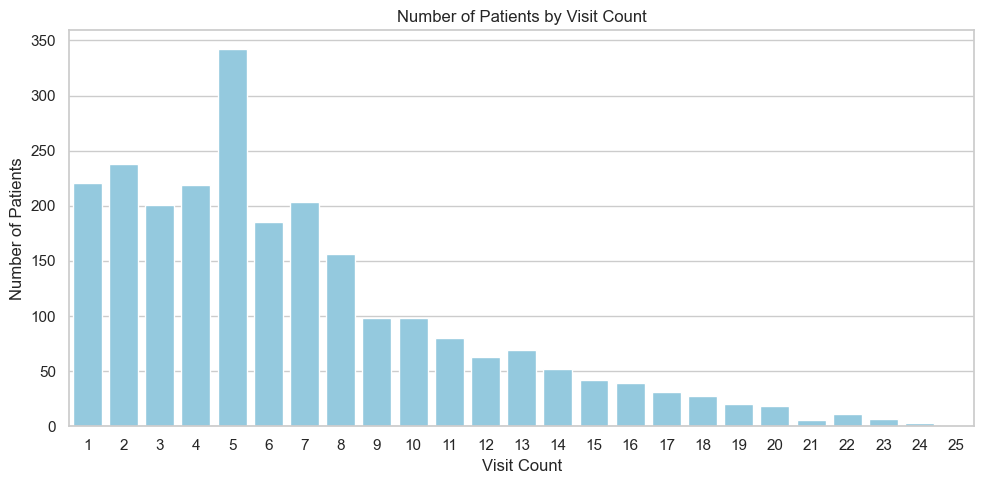

In [9]:
# Group by patient ID and count visits
visits_per_patient = dataset.groupby("PTID").size()

# Count how many patients have N visits
visit_counts = visits_per_patient.value_counts().sort_index()

# Prepare DataFrame for Visualizer
df_visit_counts = visit_counts.reset_index()
df_visit_counts.columns = ["visit_count", "patient_count"]
viz_counts = Visualizer(df_visit_counts)

# Plot bar chart
viz_counts.bar_plot(
    x="visit_count", y="patient_count",
    title="Number of Patients by Visit Count",
    xlabel="Visit Count", ylabel="Number of Patients",
    figsize=(10, 5), color="skyblue"
)

Displays the different VISCODE values. VISCODE indicates the time of the visit (e.g., "bl" = baseline, "m06" = month 6, etc.).

In [10]:
# Function to extract number from VISCODE (bl -> -1 to make it come first)
def sort_key(viscode):
    if viscode == "bl":
        return -1
    match = re.match(r"m(\d+)", viscode)
    return int(match.group(1)) if match else float("inf")

# Calculating ordered counts
viscode_counts = dataset["VISCODE"].value_counts()
sorted_viscode_counts = viscode_counts.loc[sorted(viscode_counts.index, key=sort_key)]

print("VISCODE value counts:")
for viscode, count in sorted_viscode_counts.items():
    print(f"{viscode} \t\t {count}")

VISCODE value counts:
bl 		 2430
m0 		 1
m03 		 793
m06 		 1618
m12 		 1970
m18 		 1320
m24 		 1596
m30 		 815
m36 		 1070
m42 		 357
m48 		 846
m54 		 266
m60 		 466
m66 		 328
m72 		 389
m78 		 341
m84 		 327
m90 		 250
m96 		 267
m102 		 102
m108 		 218
m114 		 70
m120 		 148
m126 		 65
m132 		 89
m138 		 39
m144 		 52
m150 		 25
m156 		 31
m162 		 23
m168 		 29
m174 		 13
m180 		 27
m186 		 16
m192 		 13
m198 		 8
m204 		 3


Visualize the number of visits per VISCODE

<Axes: title={'center': 'Number of Visits per VISCODE'}, xlabel='VISCODE', ylabel='count'>

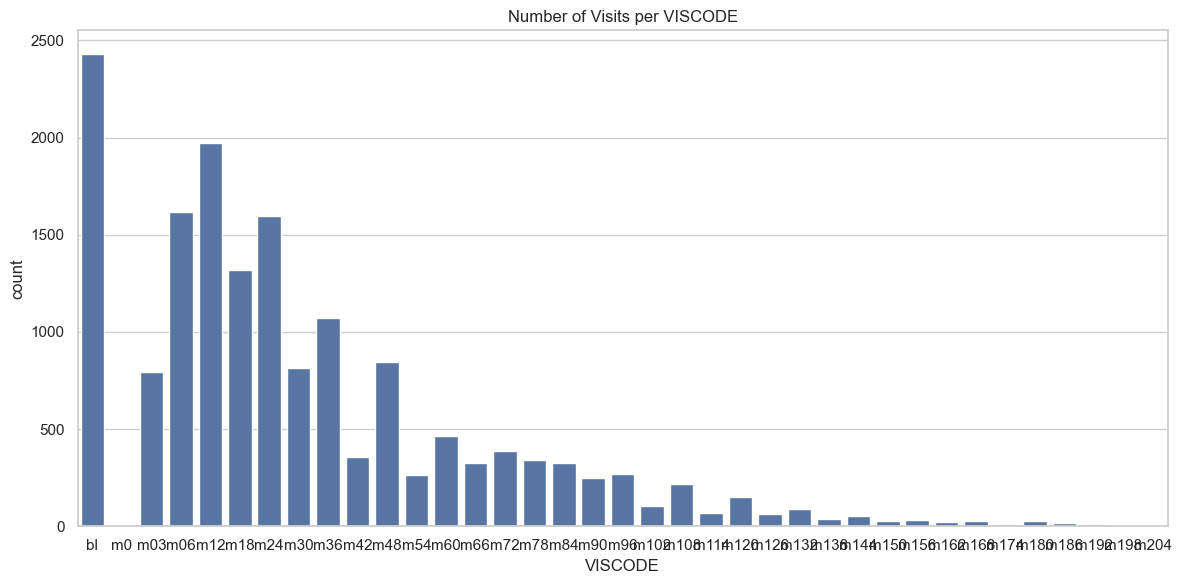

In [11]:
# Define sorted VISCODE order
sorted_viscodes = sorted(dataset["VISCODE"].dropna().unique(), key=sort_key)

# Convert VISCODE to categorical with custom order
dataset_copy = dataset.copy()
dataset_copy["VISCODE"] = pd.Categorical(dataset_copy["VISCODE"],
                                         categories=sorted_viscodes, ordered=True)

viz_viscode = Visualizer(dataset_copy)

# Plot count plot
viz_viscode.count_plot(x="VISCODE", figsize=(12, 6), title="Number of Visits per VISCODE", return_ax=True)


Now let"s analyze visits by year of visit. We"ve already seen that there are no missing EXAMDATEs, so we can safely analyze this column.

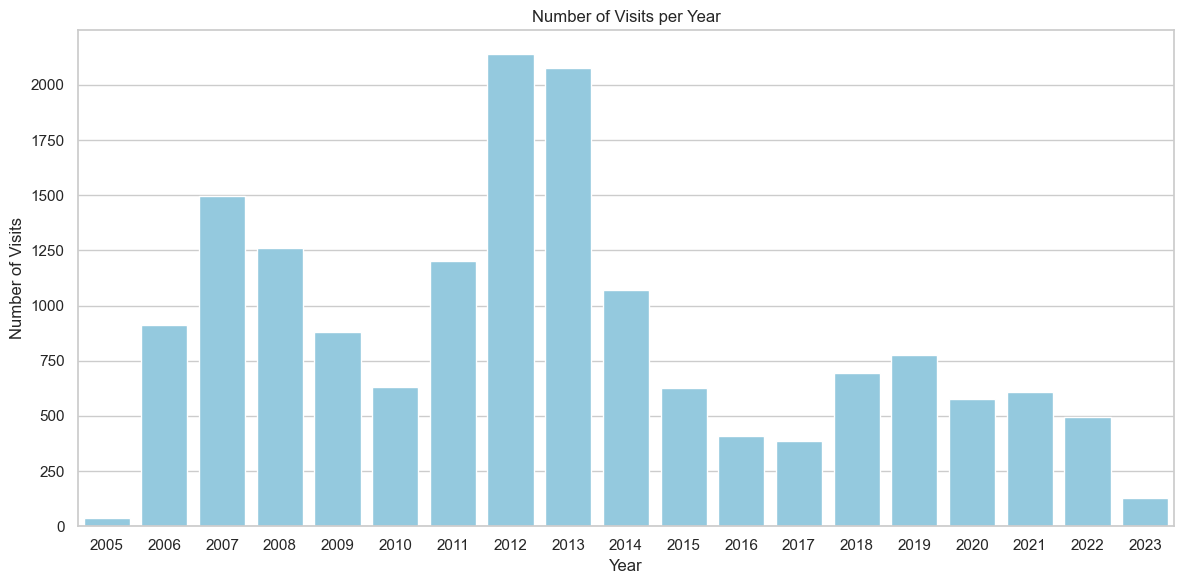

In [12]:
# Convert EXAMDATE to datetime and extract year
dataset_copy = dataset.copy()
dataset_copy["EXAMDATE"] = pd.to_datetime(dataset_copy["EXAMDATE"], errors="coerce")
dataset_copy["EXAM_YEAR"] = dataset_copy["EXAMDATE"].dt.year

# Count visits per year
visits_per_year = dataset_copy["EXAM_YEAR"].value_counts().sort_index()
df_visits_year = visits_per_year.reset_index()
df_visits_year.columns = ["EXAM_YEAR", "count"]

viz_year = Visualizer(df_visits_year)

# Plot bar chart
viz_year.bar_plot(
    x="EXAM_YEAR", y="count",
    title="Number of Visits per Year",
    xlabel="Year", ylabel="Number of Visits",
    figsize=(12, 6), color="skyblue"
)



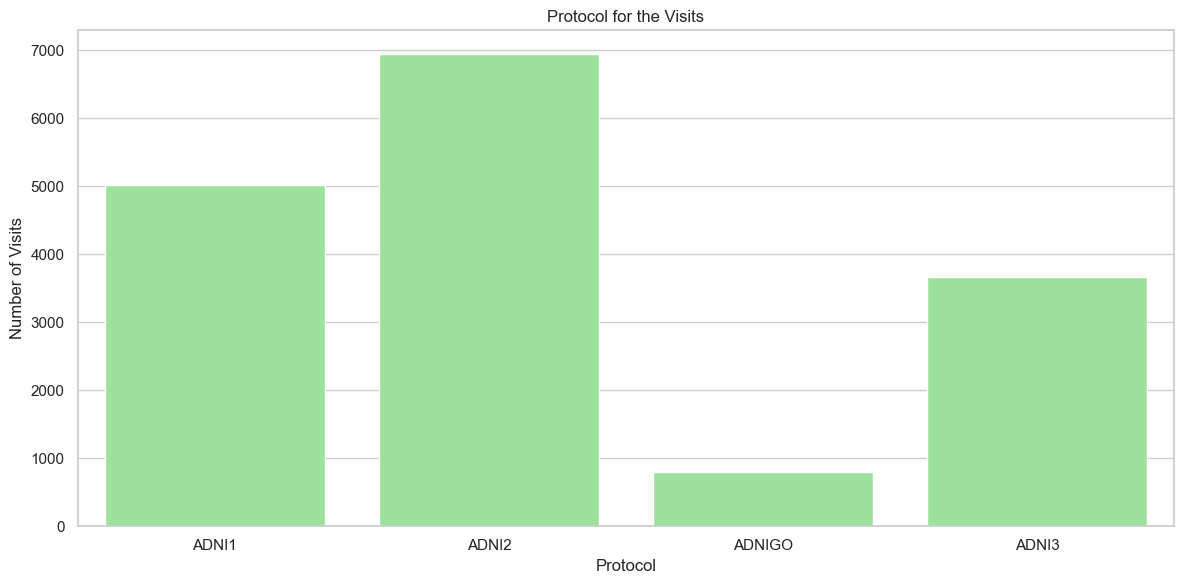

In [13]:
viz.bar_plot(x="COLPROT", title="Protocol for the Visits",
    xlabel="Protocol", ylabel="Number of Visits",
    figsize=(12, 6), color="lightgreen")

## Diagnosys Analysis

Since the class column for our classification problem is DX (the diagnosis) we want to look at the types of classes we have for our problem.

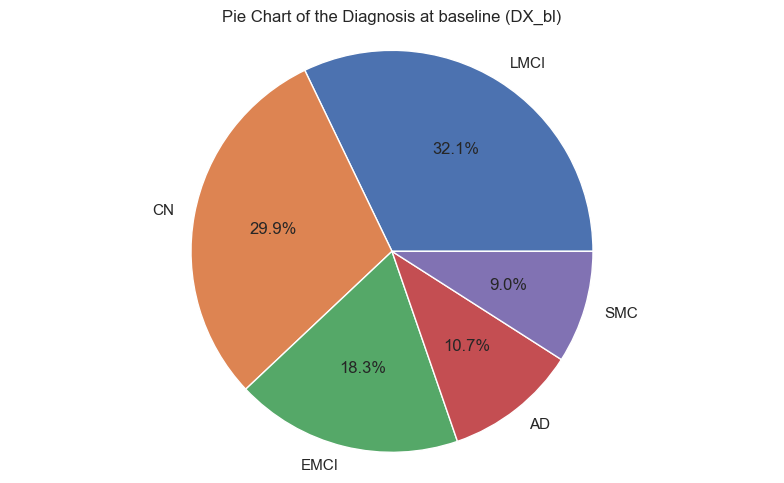

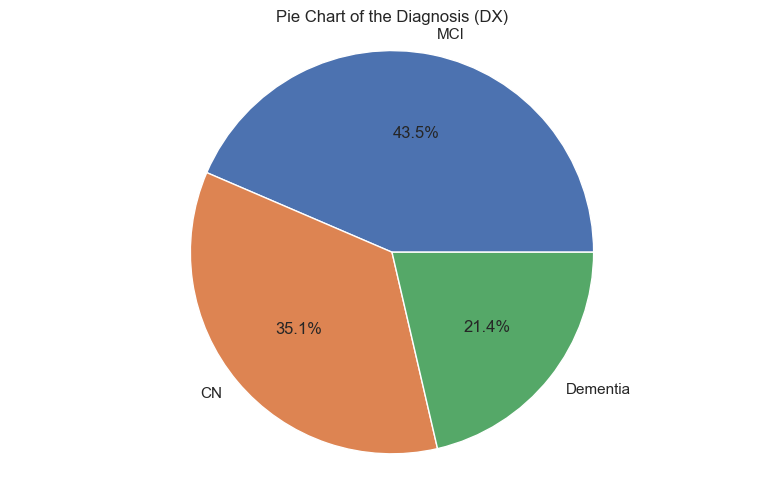

In [14]:
viz.pie_chart(
    x='DX_bl',
    figsize=(8, 5),
    title="Pie Chart of the Diagnosis at baseline (DX_bl)"
)

viz.pie_chart(
    x='DX',
    figsize=(8, 5),
    title="Pie Chart of the Diagnosis (DX)"
)

In [15]:
# Count the occurrences of each diagnosis in the 'DX_bl' column
print("Value counts for 'DX_bl':")
print(dataset['DX_bl'].value_counts())

# Count the occurrences of each diagnosis in the 'DX' column
print("\nValue counts for 'DX':")
print(dataset['DX'].value_counts())


Value counts for 'DX_bl':
DX_bl
LMCI    5275
CN      4904
EMCI    2995
AD      1751
SMC     1485
Name: count, dtype: int64

Value counts for 'DX':
DX
MCI         4989
CN          4020
Dementia    2449
Name: count, dtype: int64
